In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import openpathsampling as paths

## Fake data for examples

In [2]:
exact = [1.0, 0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625]
iface1 = [2.0, 1.0, 0.5, 0.25, 0.125, 0.0625, 0.0]
iface2 = [1.0, 1.0, 1.0, 0.5, 0.25, 0.125, 0.0625]
iface3 = [3.0, 3.0, 3.0, 3.0, 3.0, 1.5, 0.75]

index = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

If we plot that data 

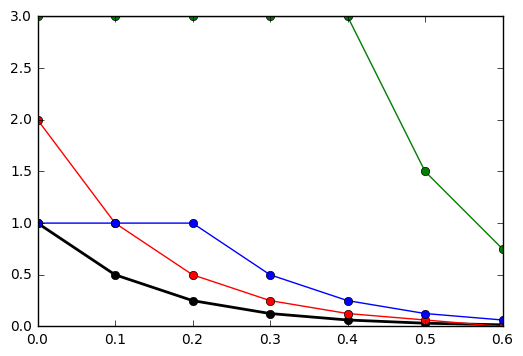

In [3]:
plt.plot(index, exact, '-ok', lw=2)
for (iface, style) in zip([iface1, iface2, iface3], ['-or', '-ob', '-og']):
    plt.plot(index, iface, style)

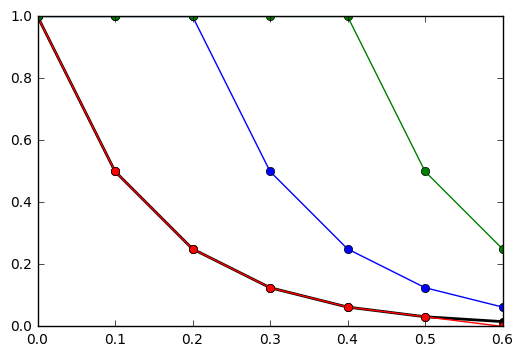

In [4]:
plt.plot(index, exact, '-ok', lw=2)
for (iface, style) in zip([iface1, iface2, iface3], ['-or', '-ob', '-og']):
    plt.plot(index, [i/iface[0] for i in iface], style)

In [5]:
input_df = pd.DataFrame(data=np.array([iface1, iface2, iface3]).T,
                        index=index,
                        columns=["I'face 1", "I'face 2", "I'face 3"])

In [6]:
input_df

,I'face 1,I'face 2,I'face 3
0.0,2.0000,1.0000,3.00
0.1,1.0000,1.0000,3.00
0.2,0.5000,1.0000,3.00
0.3,0.2500,0.5000,3.00
0.4,0.1250,0.2500,3.00
0.5,0.0625,0.1250,1.50
0.6,0.0000,0.0625,0.75


## Preparing the system based on cutoffs

The data comes from OPS in the form of the `input_df` above. In order to be prepared for the WHAM analysis, we first:

1. Remove repeated leading copies of the maximum value.
2. Remove contributions that fall below `cutoff * max_value` from each individual histogram.

Importantly, this should work regardless of `max_value` for each interface.

In [7]:
wham = paths.numerics.WHAM(cutoff=0.1, interfaces=[0.0, 0.2, 0.3])

In [8]:
wham.prep_reverse_cumulative(input_df)

,I'face 1,I'face 2,I'face 3
0.0,2.00,0.000,0.00
0.1,1.00,0.000,0.00
0.2,0.50,1.000,0.00
0.3,0.25,0.500,3.00
0.4,0.00,0.250,3.00
0.5,0.00,0.125,1.50
0.6,0.00,0.000,0.75


In [9]:
#plt.plot

## Combining the results from multiple interfaces

Of course, the fundamental goal is to join the data from all the interfaces into one result. This is done 

In [10]:
final_result = wham.wham_bam_histogram(input_df)

In [11]:
# plt.plot